In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_text
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import tree

In [6]:
datos = pd.read_csv('U4_01_housing.csv')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

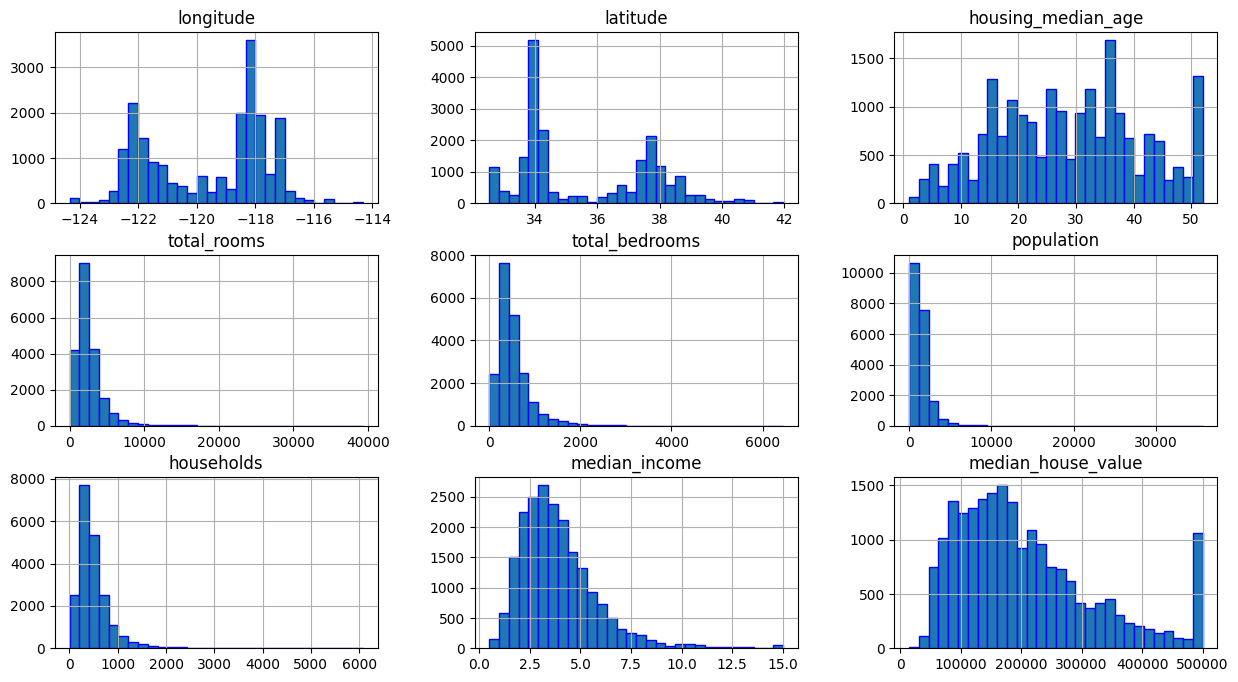

In [7]:
datos.hist( figsize=(15,8), bins=30, edgecolor = 'blue')

In [8]:
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)

datos = datos.join(dummies)

datos = datos.drop(['ocean_proximity'], axis=1)

In [9]:
datos['room_ratio'] = datos['total_bedrooms'] /  datos['total_rooms']

In [10]:
X = datos.drop(['median_house_value'], axis=1)

y = datos['median_house_value']

In [11]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.2)

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


In [12]:
modelo = DecisionTreeRegressor(max_depth=10, random_state=42)
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)

In [13]:
comparativa = { 'predicciones': predicciones, 'Valor': y_test }
pd.DataFrame(comparativa)

,predicciones,Valor
12956,168589.062500,115400.0
8370,179360.377358,137800.0
4994,102472.368421,114800.0
15663,461694.191489,500001.0
17905,253528.893048,269900.0
...,...,...
9097,113430.769231,156700.0
19850,57016.541353,53500.0
11204,172579.012346,160600.0
11138,193696.904025,182900.0


In [14]:
print("R^2 en conjunto de entrenamiento:", modelo.score(X_train, y_train))
print("R^2 en conjunto de prueba:", modelo.score(X_test, y_test))

R^2 en conjunto de entrenamiento: 0.8232351098663475
R^2 en conjunto de prueba: 0.7165963163118183


In [15]:
feature_importance = modelo.feature_importances_

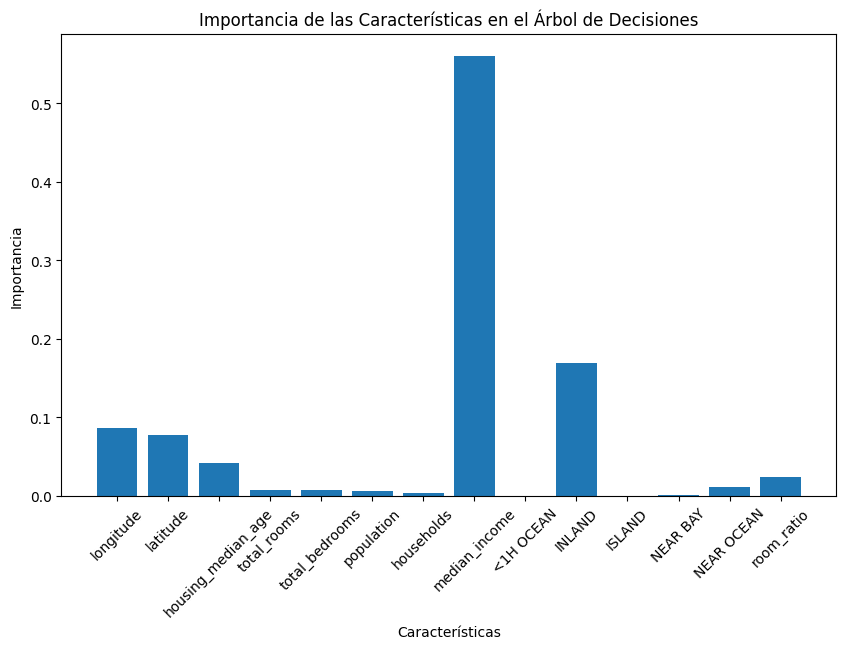

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Árbol de Decisiones')
plt.xticks(rotation=45)
plt.show()

In [17]:
print(modelo.score(X_train, y_train))
print(modelo.score(X_test, y_test))

0.8232351098663475
0.7165963163118183


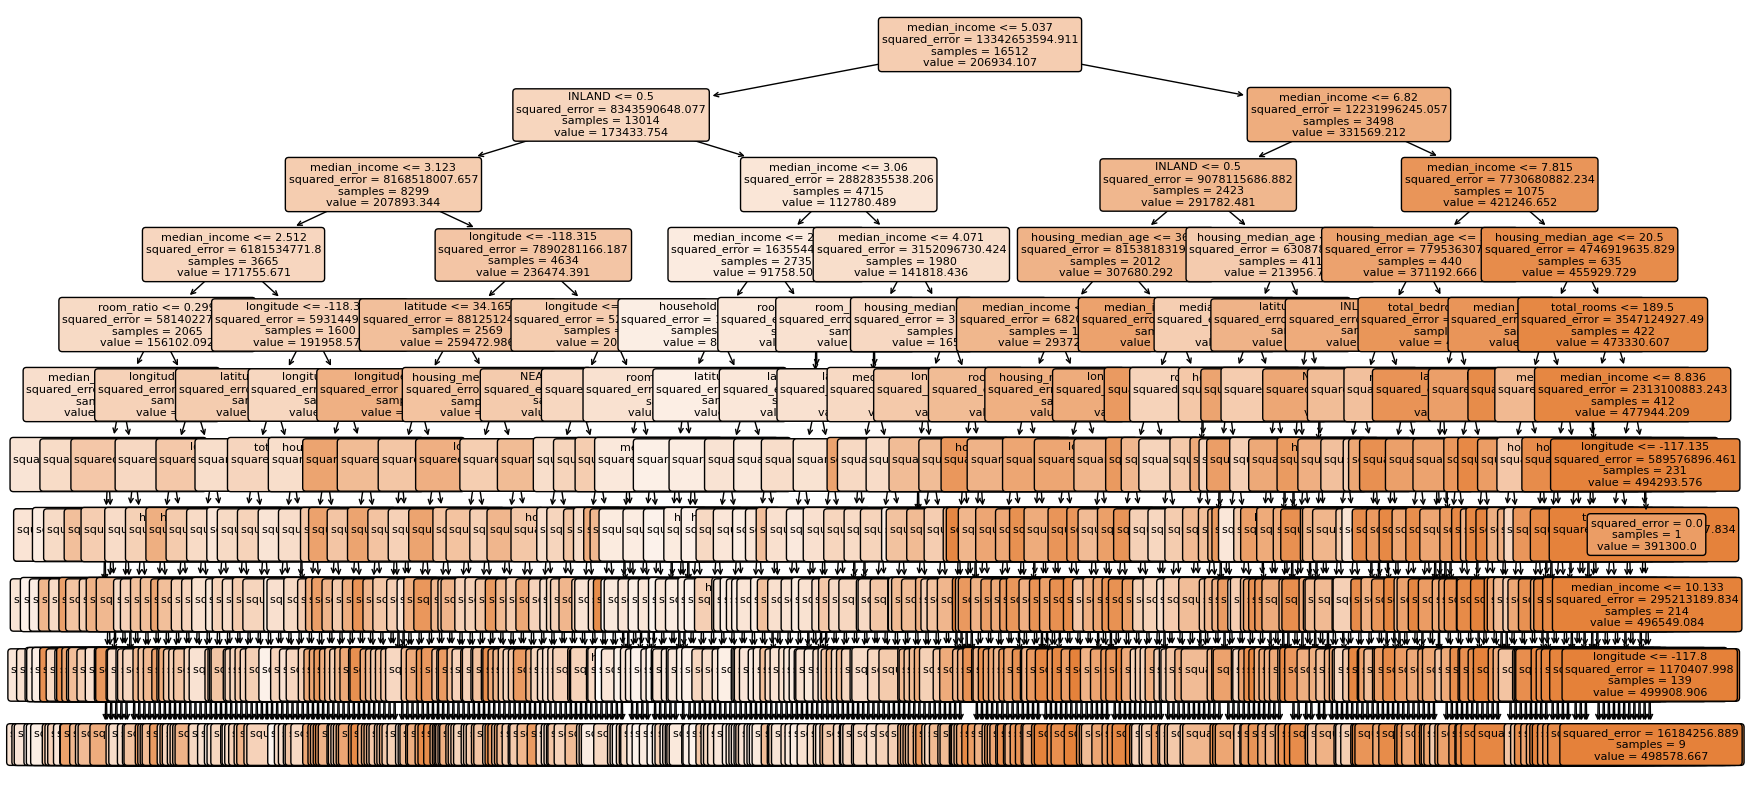

In [18]:
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()